In [17]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [44]:
data=pd.read_csv('HR_comma_sep.csv')

In [45]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [46]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [47]:
y=data['left'] 
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
len(x_train)

11999

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder=LabelEncoder()

In [52]:
data['Department_encoder']=label_encoder.fit_transform(data['Department'])	

In [53]:
data['salary_encoder']=label_encoder.fit_transform(data['salary'])


In [54]:
data['Department_encoder'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [55]:
data['salary_encoder'].unique()

array([1, 2, 0])

In [28]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_encoder,salary_encoder
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,8,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,1


In [56]:
data.drop(['Department','salary'],axis=1,inplace=True)

In [57]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoder,salary_encoder
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [58]:
x=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','salary_encoder','promotion_last_5years','Department_encoder']]
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary_encoder,promotion_last_5years,Department_encoder
0,0.38,0.53,2,157,3,0,1,0,7
1,0.80,0.86,5,262,6,0,2,0,7
2,0.11,0.88,7,272,4,0,2,0,7
3,0.72,0.87,5,223,5,0,1,0,7
4,0.37,0.52,2,159,3,0,1,0,7
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8
14995,0.37,0.48,2,160,3,0,1,0,8
14996,0.37,0.53,2,143,3,0,1,0,8
14997,0.11,0.96,6,280,4,0,1,0,8


In [59]:
model=LogisticRegression()

In [60]:
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
#make prediction

In [62]:
y_prediction=model.predict(x_test)

In [63]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
3297     0
14113    0
5514     0
9939     0
14346    1
Name: left, Length: 3000, dtype: int64

In [64]:
df=pd.DataFrame(y_prediction,y_test)
df

,0
left,
0,0
0,0
0,0
1,0
0,0
...,...
0,0
0,0
0,0


In [65]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoder,salary_encoder
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [66]:
model.score(x_train,y_train)

0.7676473039419952

In [67]:
model.score(x_test,y_test)

0.757

In [68]:
import seaborn as sns

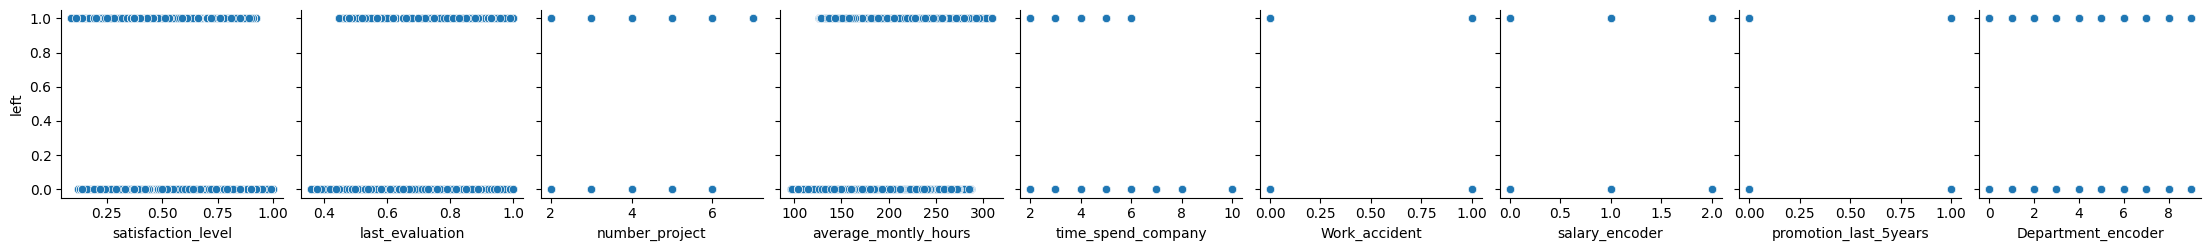

In [69]:
sns.pairplot(data,x_vars=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','salary_encoder','promotion_last_5years','Department_encoder'],y_vars=[''])

In [80]:
a=model.predict(x_test)

Text(0.5, 0, 'left')

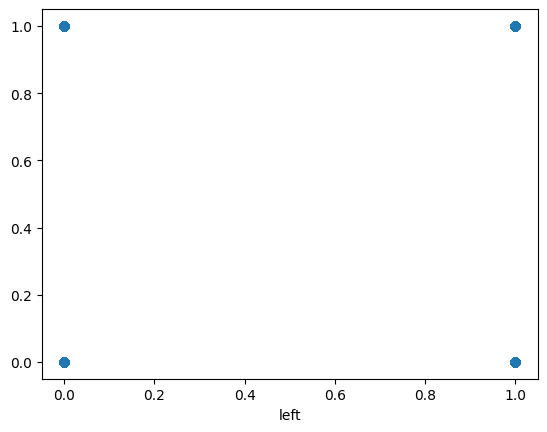

In [82]:
plt.scatter(y_test,a)
plt.xlabel('left')

In [72]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoder,salary_encoder
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [73]:
model.predict([[0.38,0.867,7,151,3,0,1,0,8]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [74]:
model.score(x_test,y_test)

0.757

In [75]:
accuracy=accuracy_score(y_test,y_prediction)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.76


In [76]:
conf_metrix=confusion_matrix(y_test,y_prediction)
print("confusion matrix:\n", conf_metrix)

confusion matrix:
 [[2110  184]
 [ 545  161]]


In [77]:
class_report=classification_report(y_test,y_prediction)
print("classification report:\n", class_report)

classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

